<h1 align = center>Neural Networks</h1>

**Artificial neural networks (ANN)** or connectionist systems are computing systems that are inspired by, but not identical to, biological neural networks that constitute animal brains. 

Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules. 

**For example**, in image recognition, they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the results to identify cats in other images. They do this without any prior knowledge of cats, for example, that they have fur, tails, whiskers and cat-like faces. Instead, they automatically generate identifying characteristics from the examples that they process.


An ANN is based on a collection of connected `units or nodes` called <b>artificial neurons</b>, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it.


##### Biological motivation and connections

The basic computational unit of the brain is a neuron. Approximately 86 billion neurons can be found in the human nervous system and they are connected with approximately $10^14 - 10^15$ synapses. The diagram below shows a cartoon drawing of a biological neuron (left) and a common mathematical model (right). Each neuron receives input signals from its dendrites and produces output signals along its (single) axon. The axon eventually branches out and connects via synapses to dendrites of other neurons. In the computational model of a neuron, the signals that travel along the axons (e.g. $x_0$) interact multiplicatively (e.g. $w_0x_0$) with the dendrites of the other neuron based on the synaptic strength at that synapse (e.g. $w_0$). The idea is that the synaptic strengths (the weights  w) are learnable and control the strength of influence (and its direction: excitory (positive weight) or inhibitory (negative weight)) of one neuron on another. In the basic model, the dendrites carry the signal to the cell body where they all get summed. If the final sum is above a certain threshold, the neuron can fire, sending a spike along its axon. In the computational model, we assume that the precise timings of the spikes do not matter, and that only the frequency of the firing communicates information. Based on this rate code interpretation, we model the firing rate of the neuron with an activation function f, which represents the frequency of the spikes along the axon. Historically, a common choice of activation function is the sigmoid function $σ$, since it takes a real-valued input (the signal strength after the sum) and squashes it to range between 0 and 1. We will see details of these activation functions later in this section.

<img src ='Image/Regression/neuron.png'/>

<hr>
<img src = 'Image/Regression/0.jpg'/>
In ANN implementations, the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called  **edges**. Neurons and edges typically have a `weight that adjusts as learning proceeds`. The weight `increases` or `decreases` the strength of the signal at a connection. Neurons may have a `threshold` such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the **first layer(the input layer)**, to the **last layer(the output layer)**, possibly after traversing the layers multiple times.

<img src = 'https://lh3.googleusercontent.com/-39A0GIv31hQ/Xa2l21EPmGI/AAAAAAAAF4g/paBlixHqMy4YQsMMDy0VfbltkVg694AVACK8BGAsYHg/s0/2019-10-21.jpg'>

The original goal of the ANN approach was to solve problems in the same way that a human brain would. However, over time, attention moved to performing specific tasks, leading to deviations from biology. 


ANNs have been used on a variety of tasks: 
1. Including computer vision, 
2. Speech recognition, 
3. Machine translation, 
5. Social network filtering, 
6. Playing board and video games, 
7. Medical diagnosis and even in activities that have traditionally been considered as reserved to humans, like painting.

It is possible to introduce neural networks without appealing to brain analogies. In the section on linear classification we computed scores for different visual categories given the image using the formula  $s = W_x$ , where W was a matrix and  x was an input column vector containing all pixel data of the image. In the case of CIFAR-10, x  is a [3072x1] column vector, and W is a [10x3072] matrix, so that the output scores is a vector of 10 class scores.


An example neural network would instead compute$s=W_2 max(0,W_1 x)$. Here, W1 could be, for example, a [100x3072] matrix transforming the image into a 100-dimensional intermediate vector. The function max(0,−)is a non-linearity that is applied elementwise. There are several choices we could make for the non-linearity (which we’ll study below), but this one is a common choice and simply thresholds all activations that are below zero to zero. Finally, the matrix $W_2$ would then be of size [10x100], so that we again get 10 numbers out that we interpret as the class scores. Notice that the non-linearity is critical computationally - if we left it out, the two matrices could be collapsed to a single matrix, and therefore the predicted class scores would again be a linear function of the input. The non-linearity is where we get the wiggle. The parameters $W_2,W_1$ are learned with stochastic gradient descent, and their gradients are derived with chain rule (and computed with backpropagation).

A three-layer neural network could analogously look like  $s=W_3max(0,W2max(0,W1x))$, where all of $W_3,W_2,W_1$ are parameters to be learned. The sizes of the intermediate hidden vectors are hyperparameters of the network and we’ll see how we can set them later. Lets now look into how we can interpret these computations from the neuron/network perspective.

#### Modeling one neuron

The area of Neural Networks has originally been primarily inspired by the goal of modeling biological neural systems, but has since diverged and become a matter of engineering and achieving good results in Machine Learning tasks. Nonetheless, we begin our discussion with a very brief and high-level description of the biological system that a large portion of this area has been inspired by.

In [1]:
def forward(self, inputs):
    """ assume inputs and weights are 1-D numpy arrays and bias is a number """
    cell_body_sum = np.sum(inputs * self.weights) + self.bias
    
    firing_rate = 1.0 / (1.0 + math.exp(-cell_body_sum)) # sigmoid activation function
    return firing_rate

In other words, each neuron performs a dot product with the input and its weights, adds the bias and applies the non-linearity (or activation function), in this case the sigmoid 




$σ(x)=1/(1+e−^x)$
. We will go into more details about different activation functions at the end of this section.



Coarse model. It’s important to stress that this model of a biological neuron is very coarse: For example, there are many different types of neurons, each with different properties. The dendrites in biological neurons perform complex nonlinear computations. The synapses are not just a single weight, they’re a complex non-linear dynamical system. The exact timing of the output spikes in many systems is known to be important, suggesting that the rate code approximation may not hold. Due to all these and many other simplifications, be prepared to hear groaning sounds from anyone with some neuroscience background if you draw analogies between Neural Networks and real brains. See this [Refference]('https://neurophysics.ucsd.edu/courses/physics_171/annurev.neuro.28.061604.135703.pdf'), or more recently this review if you are interested.

<img src = 'Image/Labelled.png'>

#### A Simple Neural Network
The following image shows the general building principle of a simple artificial neural network:

Building Principle of a Simple Artificial Neural Network

We will write a very simple Neural Network implementing the logical "And" and "Or" functions.

<img src='Image/simple_ANN.png'/>

Let's start with the "And" function. It is defined for two inputs:

|Input1|Input2|Output|
|------|------|------|
|0|0|0|
|0|1|0|
|1|0|0|
|1|1|1|

#### Line Separation
You could imagine that you have two attributes describing am eddible object like a fruit for example: "sweetness" and "sourness"

We could describe this by points in a two-dimensional space. The x axis for the sweetness and the y axis for the sourness. Imagine now that we have two fruits as points in this space, i.e. an orange at position (3.5, 1.8) and a lemon at (1.1, 3.9).

We could define dividing lines to define the points which are more lemon-like and which are more orange-like. The following program calculates and renders a bunch of lines. The red ones are completely unusable for this purpose, because they are not separating the classes. Yet, it is obvious that even the green ones are not all useful.



<Figure size 1152x648 with 0 Axes>

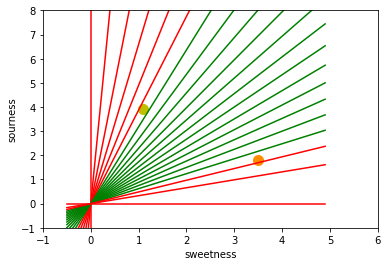

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,9))


def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """ returns tuple (d, pos)
            d is the distance
            If pos == -1 point is below the line, 
            0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance
    

points = [ (3.5, 1.8), (1.1, 3.9) ]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
ax.set_xlim([-1, 6])
ax.set_ylim([-1, 8])
X = np.arange(-0.5, 5, 0.1)


colors = ["r", ""] # for the samples

size = 10
for (index, (x, y)) in enumerate(points):
    if index== 0:
        ax.plot(x, y, "o", 
                color="darkorange", 
                markersize=size)
    else:
        ax.plot(x, y, "oy", 
                markersize=size)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    #print("x: ", x, "slope: ", slope)
    Y = slope * X
    
    results = []
    for point in points:
        results.append(dist4line1(*point))
    #print(slope, results)
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-")
    else:
        ax.plot(X, Y, "r-")
        

plt.show()

In the following program, we train a neural network to classify two clusters in a 2-dimensional space. We show this in the following diagram with the two classes class1 and class2. We will create those points randomly with the help of a line, the points of class2 will be above the line and the points of class1 will be below the line.

In [7]:
import numpy as np

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights is None:
            self.weights = np.ones(input_length) * 0.5
        else:
            self.weights = weights`
        
    @staticmethod
    def unit_step_function(x):
        if x > 0.5:
            return 1
        return 0
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
p = Perceptron(2, np.array([0.5, 0.5]))

In [8]:
data_in = np.empty((2,))
for in1 in range(2):
    for in2 in range(2):
        data_in = (in1, in2)
        data_out = p(data_in)
        print(data_in, data_out)

(0, 0) 0
(0, 1) 0
(1, 0) 0
(1, 1) 1


We will see that the neural network will find a line that separates the two classes. This line should not be mistaken for the line, which we used to create the points.

This line is called a decision boundary.

In [10]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, input_length, weights=None):
        if weights==None:
            self.weights = np.random.random((input_length)) * 2 - 1
        self.learning_rate = 0.1
        
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        return 1
        
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return Perceptron.unit_step_function(weighted_sum)
    
    def adjust(self, 
               target_result, 
               calculated_result,
               in_data):
        error = target_result - calculated_result
        for i in range(len(in_data)):
            correction = error * in_data[i] *self.learning_rate
            self.weights[i] += correction 

     
def above_line(point, line_func):
    x, y = point
    if y > line_func(x):
        return 1
    else:
        return 0
  
points = np.random.randint(1, 100, (100, 2))
p = Perceptron(2)

def lin1(x):
    return  x + 4

for point in points:
    p.adjust(above_line(point, lin1), 
             p(point), 
             point)

evaluation = Counter()
for point in points:
    if p(point) == above_line(point, lin1):
        evaluation["correct"] += 1
    else:
        evaluation["wrong"] += 1

print(evaluation.most_common())


[('correct', 98), ('wrong', 2)]


We will see that the neural network will find a line that separates the two classes. This line should not be mistaken for the line, which we used to create the points.

This line is called a decision boundary.


The decision boundary of our previous network can be calculated by looking at the following condition

$x_1 w_1 + x_2w_2 = 0$

We can change the equation into

$x_2 = -\frac{w_1}{w_2}x_1$


When we look at the general form of a straight line y = mx + b we can easily see that our equation corresponds to the definition of a line and the slope (aka gradient)  $ m -\frac{w_1}{w_2}$  and b is equal to 0.
